# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# 0) Dataset ✈️🌎

Nos basamos en el dataset de Kaggle: [Travel Insurance](https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data).

# 1) Cargamos los datos 📕

In [1]:
import pandas as pd
from funpymodeling.exploratory import status

In [2]:
# Para este caso nos interesa visualizar todas las columnas
pd.set_option('display.max_columns', None)

Como este dataset lo guardaron con su index, lo vamos a mentener.
<br>Para eso usamos index_col=0, donde le decimos que use la columna 0 como index.

In [3]:
data = pd.read_csv("data/TravelInsurancePrediction.csv", sep=',', index_col=0) 

In [4]:
data.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


*Nota:* si bien el valor defecto de sep en `read_csv` es la coma `,`. 
<br>Siempre lo hago explícito porque a veces los archivos vienen separados por punto y coma, u otro separador como tab. Es una buena práctica, y también aplica cuando graban archivos.

# 2) Preparación de la data 👀

In [5]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,11,int64
1,Employment Type,0,0.0,0,0.000000,2,object
2,GraduateOrNot,0,0.0,0,0.000000,2,object
3,AnnualIncome,0,0.0,0,0.000000,30,int64
4,FamilyMembers,0,0.0,0,0.000000,8,int64
5,ChronicDiseases,0,0.0,1435,0.722194,2,int64
6,FrequentFlyer,0,0.0,0,0.000000,2,object
7,EverTravelledAbroad,0,0.0,0,0.000000,2,object
8,TravelInsurance,0,0.0,1277,0.642677,2,int64


Como tenemos algunas columnas con valores binarios `yes/no` podemos pasarla a `1/0`.
<br>Así evitamos tener tantas columnas si hacemos un get_dummies.

In [6]:
class_map = {'No':0, 'Yes':1}
columns_booleans = ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']

for name_column in columns_booleans:
    data[name_column] = data[name_column].map(class_map)

Por otro lado, la columna `Employment Type` recibe valores como `Government Sector` y `Government Sector`.

In [7]:
class_map = {'Government Sector':0, 'Private Sector/Self Employed':1}
data['Employment Type'] = data['Employment Type'].map(class_map)

Visualizar data acondicionada y preparada:

In [8]:
data.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [9]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,11,int64
1,Employment Type,0,0.0,570,0.286865,2,int64
2,GraduateOrNot,0,0.0,295,0.148465,2,int64
3,AnnualIncome,0,0.0,0,0.000000,30,int64
4,FamilyMembers,0,0.0,0,0.000000,8,int64
5,ChronicDiseases,0,0.0,1435,0.722194,2,int64
6,FrequentFlyer,0,0.0,1570,0.790136,2,int64
7,EverTravelledAbroad,0,0.0,1607,0.808757,2,int64
8,TravelInsurance,0,0.0,1277,0.642677,2,int64


# 3) Clasificación 🎯

## 3.1) Separación de X de Y, y luego TR de TS (rutina):

In [10]:
data_x = data.drop('TravelInsurance', axis=1)
data_y = data['TravelInsurance']

Nos quedamos solo con los valores del dataframe

In [11]:
data_x = data_x.values
data_y = data_y.values

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3)

## 3.2) Creación del modelo predictivo

In [13]:
from sklearn.ensemble import RandomForestClassifier 

# Creamos 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 99)

In [14]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=99)

## 3.3) Predicción de la clase y score

In [15]:
rf.predict(x_train)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
pred_probs=rf.predict_proba(x_train)

In [17]:
pred_probs

array([[0.8958   , 0.1042   ],
       [0.07     , 0.93     ],
       [0.8794119, 0.1205881],
       ...,
       [0.081    , 0.919    ],
       [0.995    , 0.005    ],
       [0.913    , 0.087    ]])

In [18]:
y_prob_tr=pred_probs[:,1]

In [19]:
y_prob_tr

array([0.1042   , 0.93     , 0.1205881, ..., 0.919    , 0.005    ,
       0.087    ])

Lo que sigue:
    
- Matriz de confusión (MC) default (con sklearn)
- MC con crosstab
- Cambiar el punto de corte y graficar la MC
- Comparar antes y después de MC
- Función para "encontrar" punto de corte
- Curva ROC

## 3.4) Matriz de confusión

In [20]:
# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay

Sino se los toma, actualicen la librería: `!pip install --upgrade scikit-learn`

Vamos a usar directamente el que grafica porque incluye la matriz original

### a) Valores absolutos:

In [21]:
import seaborn as sns

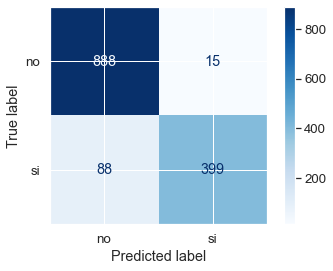

In [22]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    )

### b) Normalizando por fila:

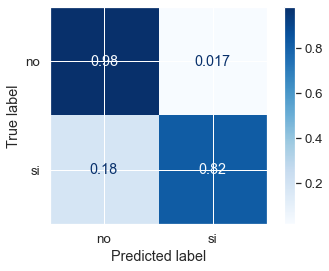

In [23]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='Blues',
    normalize='true',
    )

### c) No permite variar el punto de corte, entonces:

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

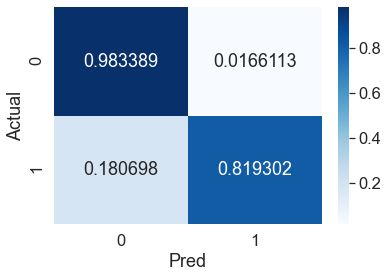

In [24]:
y_pred1=rf.predict(x_train)

sns.set(font_scale=1.5)                 # Ajuste tamaño de letra (var global)
conf_mat1=pd.crosstab(index=y_train,    # filas = valor real
                     columns=y_pred1,   # columnas = valor predicho
                     rownames=['Actual'], 
                     colnames=['Pred'], 
                     normalize='index')

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g')

### d) Seteo del punto de corte

In [25]:
y_prob_tr

array([0.1042   , 0.93     , 0.1205881, ..., 0.919    , 0.005    ,
       0.087    ])

### e) ¡Importante! Elección de un punto de corte

La primer opción es un punto que sea mayor al promedio.

In [26]:
y_prob_tr.mean()

0.35290988588786154

Creamos el label 🦾

In [27]:
import numpy as np

# Recuerden actualizar este valor 0.35 con el valor promedio que obtuvieron
np.where(y_prob_tr > 0.35, "si", "no")

array(['no', 'si', 'no', ..., 'si', 'no', 'no'], dtype='<U2')

Lo asignamos...

In [28]:
# Recuerden actualizar este valor 0.35 con el valor promedio que obtuvieron
y_pred2=np.where(y_prob_tr > 0.35, 1, 0)

In [29]:
y_pred2

array([0, 1, 0, ..., 1, 0, 0])

### f) Matriz de confusión (punto de corte custom)

<AxesSubplot:xlabel='Pred', ylabel='Actual'>

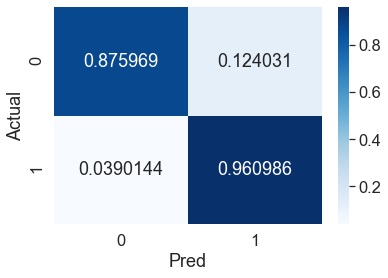

In [30]:
conf_mat2=pd.crosstab(index=y_train, 
                      columns=y_pred2,      # ¡cambio!
                      rownames=['Actual'], 
                      colnames=['Pred'], 
                      normalize='index')

sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g')

Comparando antes y después:

In [31]:
import matplotlib.pyplot as plt

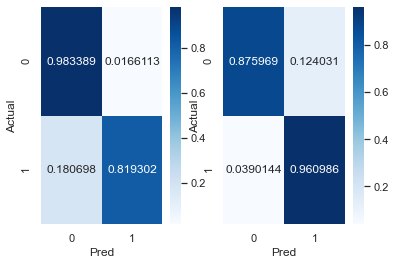

In [32]:
sns.set(font_scale=1)       # Ajuste tamaño de letra (var global)
fig, ax = plt.subplots(1,2)  

sns.heatmap(conf_mat1, annot=True, cmap='Blues', fmt='g', ax=ax[0])
sns.heatmap(conf_mat2, annot=True, cmap='Blues', fmt='g', ax=ax[1])

fig.show(warn=False)

### g) Análisis de los distintos puntos de corte

**Nota:** Nunca elegir el punto de corte con los datos de testing

In [33]:
#!pip3 install yellowbrick

Esta celda resuelve la tarea pero con muchos warnings ☢️
```
from yellowbrick.classifier.threshold import discrimination_threshold

dis_res=discrimination_threshold(rf, x_train, y_train,)
dis_res
```

👆 Así que la vamos a actualizar por esta celda:

**Nota:** Esta celda toma algunos minutos, mientras tanto espera el resultado con un café o mate 😎

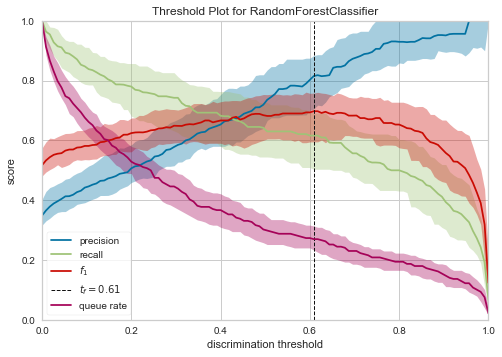

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [34]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(rf)

visualizer.fit(x_train, y_train)        # Ajustar data al visualizador
visualizer.show()                       # Mostrar figura

### h) Curva ROC

Graficamos para training y para test

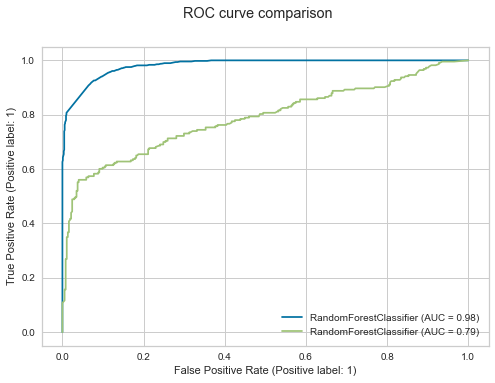

In [35]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

# 4) Regresión 🤑

### 4.1) Análisis exploratorio de datos (AED)

Histogramas de las variables:

C:\Users\Carlos\AppData\Local\Temp/ipykernel_16640/2437782003.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = fig.gca())


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Employment Type'}>,
        <AxesSubplot:title={'center':'GraduateOrNot'}>],
       [<AxesSubplot:title={'center':'AnnualIncome'}>,
        <AxesSubplot:title={'center':'FamilyMembers'}>,
        <AxesSubplot:title={'center':'ChronicDiseases'}>],
       [<AxesSubplot:title={'center':'FrequentFlyer'}>,
        <AxesSubplot:title={'center':'EverTravelledAbroad'}>,
        <AxesSubplot:title={'center':'TravelInsurance'}>]], dtype=object)

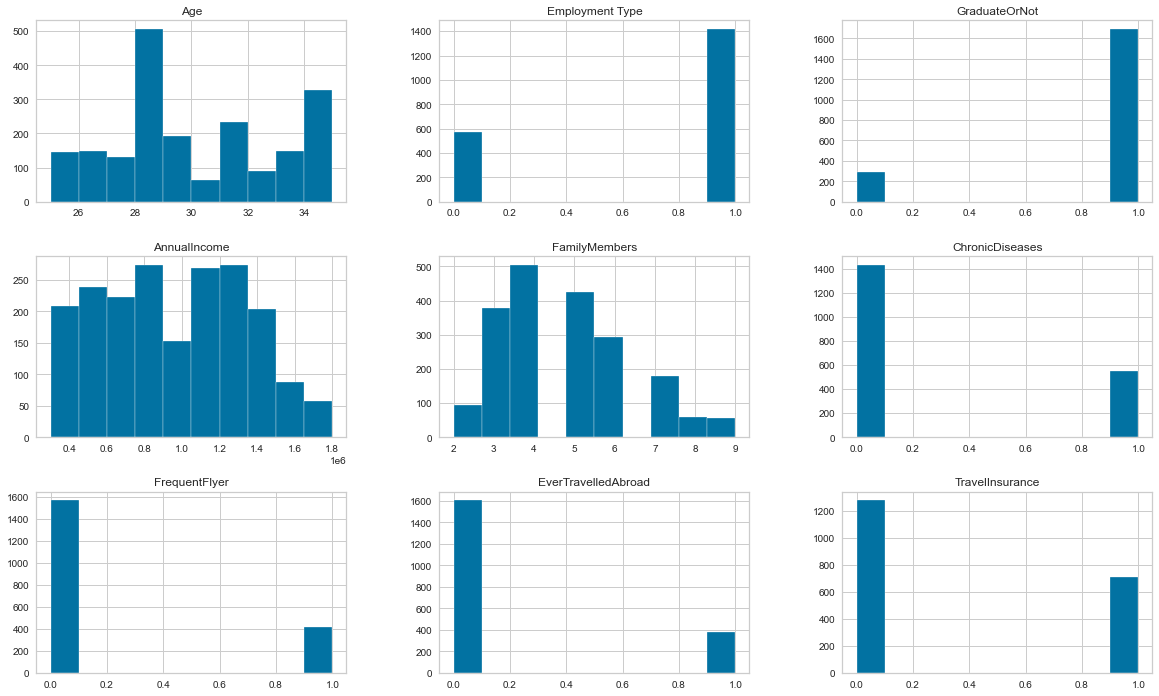

In [36]:
fig = plt.figure(figsize = (20,12))
data.hist(ax = fig.gca())

Análisis del target
<br>Solo para contarles de ggplot2.
<br>Doc oficial `plotnine`, [aquí](https://plotnine.readthedocs.io/en/stable/).

In [37]:
#!pip3 install plotnine

In [38]:
from plotnine import ggplot, geom_histogram, aes

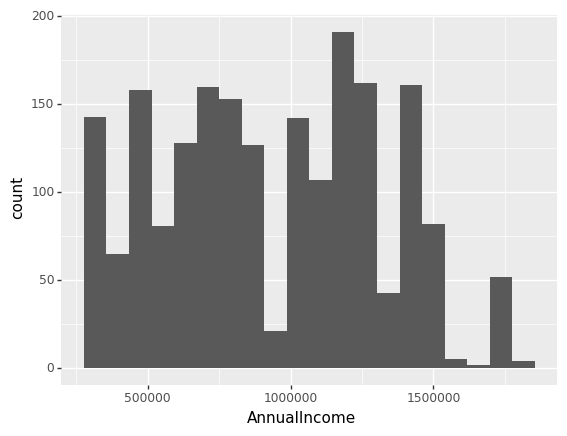

<ggplot: (165585143528)>

In [39]:
(ggplot(data)           
 + aes(x='AnnualIncome')        
 + geom_histogram(bins=20) 
)

### 4.2) Separación TR/TS

In [40]:
x_data_reg = data.drop('AnnualIncome', axis=1)
y_data_reg = data['AnnualIncome']

Obtenemos los valores del dataframe, para evitar el siguiente warning más adelante.
<br>UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names.

In [41]:
x_data_reg = x_data_reg.values
y_data_reg = y_data_reg.values

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data_reg, y_data_reg, test_size=0.3)

### 4.3) Creación del modelo de regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

# a.Creamos modelo
model = LinearRegression()

# b. fiteamos
model.fit(x_train, y_train)

# c. obtenemos predicciónes para tr y ts
pred_tr=model.predict(x_train)
pred_ts=model.predict(x_test)

In [44]:
pred_tr[0:5]

array([ 884456.45595016,  677082.50877408, 1017963.37374279,
       1031176.94418439,  671189.22094218])

**Nota:** No hay parámetros

### 4.4) Creación del RF con hypertuning (usando grid search)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

model_rf = RandomForestRegressor()

In [46]:
params = {
    'n_estimators' : [10, 20, 500, 5000],
    'max_features': [50, 100],
    #'bootstrap': [False, True],
    #'max_depth': [50, 500],
    #'min_samples_leaf': [3, 50],
    #'min_samples_split': [10, 50],
}

grid_rf = GridSearchCV(estimator = model_rf,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5, 
                        verbose = 1
                        )

Actualmente hay un conflicto de procesamiento en paralelo con GridSearchCV, por eso no se recomienda el uso de n_paralel.

Esta celda toma algunos minutos (aprox 10 min), mientras tanto espera el resultado con un café o mate 😎

In [48]:
grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False], 'max_depth': [50, 500],
                         'max_features': [50, 100], 'min_samples_leaf': [3, 50],
                         'min_samples_split': [10, 50],
                         'n_estimators': [500, 5000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [49]:
grid_rf.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=50, max_features=50,
                      min_samples_leaf=3, min_samples_split=10,
                      n_estimators=5000)

Predicción de casos nuevos:

In [50]:
grid_rf.predict(x_train)
grid_rf.predict(x_test)

array([1200000.        , 1116666.66666669,  878571.42857135,
        680000.        ,  533333.33333334, 1450000.        ,
       1185714.28571422,  787500.        ,  890000.        ,
        706250.        ,  625000.        , 1488888.88888904,
       1011111.11111109,  754545.45454549,  843750.        ,
       1150000.        ,  557142.85714289,  878571.42857135,
        894444.44444454, 1371428.57142853,  876666.66666661,
       1375000.        ,  500000.        ,  888636.36363639,
       1014285.71428577,  494444.44444445, 1025000.        ,
        864285.71428576,  660000.        ,  657142.8571429 ,
        875000.        ,  494444.44444445,  888636.36363639,
        933333.33333337,  985714.28571423,  945833.33333336,
       1400000.        , 1300000.        ,  808333.33333339,
        916666.66666663,  875000.        , 1700000.        ,
        875000.        ,  375000.        , 1400000.        ,
       1043750.        ,  933333.33333337, 1181250.        ,
        625000.        ,

### 4.5) Análisis de las métricas de error

**NOTA:** neg_mean_absolute_error más cercano a 0 es mucho mejor.

In [51]:
pd.concat([pd.DataFrame(grid_rf.cv_results_["params"]),
           pd.DataFrame(grid_rf.cv_results_["mean_test_score"], 
                        columns=["neg_mean_absolute_error"])],axis=1).sort_values('neg_mean_absolute_error', ascending=False)

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,neg_mean_absolute_error
1,False,50,50,3,10,5000,-200437.637051
16,False,500,50,3,10,500,-200438.949315
24,False,500,100,3,10,500,-200439.580525
9,False,50,100,3,10,5000,-200442.492566
25,False,500,100,3,10,5000,-200443.124204
0,False,50,50,3,10,500,-200443.995564
17,False,500,50,3,10,5000,-200446.779137
8,False,50,100,3,10,500,-200448.041470
10,False,50,100,3,50,500,-207558.996361
26,False,500,100,3,50,500,-207558.996361


Análisis métrica TR vs TS:

In [52]:
grid_rf.score(x_train, y_train)

-156865.6341160834

In [53]:
grid_rf.score(x_test, y_test)

-201195.09836338923

Links útiles:

- Para investigar más de `gridsearch`: [Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74).
- Doc oficial [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

### 4.6) Gráfico de la curva del error

**Gráfico de prediction error**

- Linea gris: Lo que nos gustaría que fuera
- Linea negra: El ajuste de regresión, de la regresión misma

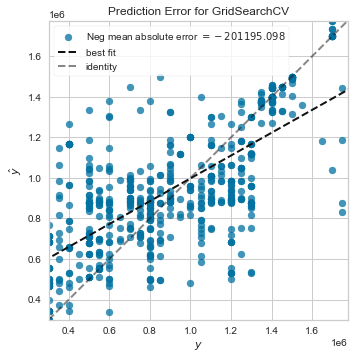

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [54]:
from yellowbrick.regressor import PredictionError

vis_pred_err = PredictionError(grid_rf)

vis_pred_err.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_pred_err.score(x_test, y_test)  # Calculamos las métricas para test
vis_pred_err.show()                 # Visualizamos!

**Gráfico de residuos**

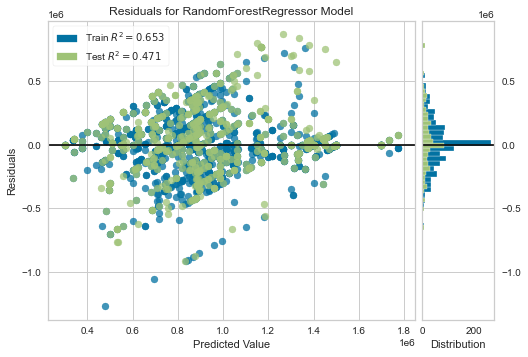

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [55]:
from yellowbrick.regressor import ResidualsPlot

# ojo: poner best_estimator_
vis_res = ResidualsPlot(grid_rf.best_estimator_)


# Copy-paste de la doc oficial: 
vis_res.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res.score(x_test, y_test)  # Calculamos las métricas para test
vis_res.show()                 # Visualizamos!

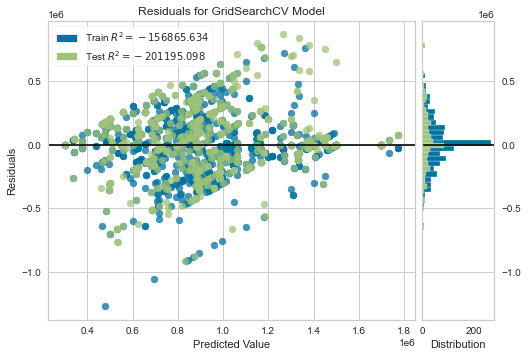

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [56]:
vis_res2 = ResidualsPlot(grid_rf)

# Copy-paste de la doc oficial: https://www.scikit-yb.org/en/latest/quickstart.html
vis_res2.fit(x_train, y_train)  # Fiteamos los datos al visualizador
vis_res2.score(x_test, y_test)  # Calculamos las métricas para test
vis_res2.show()                 # Visualizamos!

Doc oficial: https://www.scikit-yb.org/en/latest/quickstart.html

# 5) Guardar un modelo

Vamos a guardar el modelo de clasificación

In [57]:
import pickle

In [58]:
# Guardar en el disco
filename = 'rf.pkl'
pickle.dump(rf, open(filename, 'wb')) # rf = nuestro modelo

In [59]:
# Lo cargamos para usarlo en otro momento. 
rf_loaded = pickle.load(open(filename, 'rb'))

---
# Ejercicio 🌮🥤

## 📍 Objetivo
Resolver la prueba técnica para el puesto de Data Analyst de la startup [ifood](https://www.ifood.com.br/) de Brasil.
<br>Esta startup se dedica al servicio de delivery de comida similar a Pedidos Ya, Rappi y Uber Eats.

## 📍 Contexto

### La empresa

Considere una empresa bien establecida que opera en el sector minorista de alimentos. Actualmente tienen alrededor
varios cientos de miles de clientes registrados y sirven a casi un millón de consumidores al año.
Venden productos de 5 categorías principales: vinos, productos cárnicos raros, frutas exóticas, especialmente
Pescados preparados y productos dulces. Estos se pueden dividir en productos premium y productos regulares. 

Los clientes pueden ordenar y adquirir productos a través de 3 canales de venta: tiendas físicas, catálogos y
el sitio web de la empresa. A nivel mundial, la compañía tuvo ingresos sólidos y un resultado final saludable en el
últimos 3 años, pero las perspectivas de crecimiento de ganancias para los próximos 3 años no son prometedoras ... 

**Por esta razón, se están considerando varias iniciativas estratégicas para revertir esta situación. Una es mejorar la realización de actividades de marketing, con un enfoque especial en las campañas de marketing.**


### El Departamento de Marketing

El departamento de marketing fue presionado para gastar su presupuesto anual de manera más inteligente. La CMO
percibe la importancia de tener un enfoque más cuantitativo a la hora de tomar decisiones, por lo que **se contrató a un pequeño equipo de científicos de datos con un objetivo claro en mente: construir una solución que apoye las iniciativas de marketing directo.**
<br>Deseablemente, el éxito de estas actividades demostrará el área de oportunidad y también deberan convencer a los más escépticos dentro de la empresa.


### El objetivo del equipo 

Es construir un análisis para abordar el mayor beneficio para la próxima campaña de marketing, programada para el próximo mes. La nueva campaña, la sexta, tiene como objetivo vender a una nueva base de datos de clientes. 

**Para construir el análisis, se desarrollo una campaña piloto que involucró 2.240 clientes. Los clientes fueron seleccionados al azar y contactados por teléfono con respecto a la adquisición del gadget. Durante los meses siguientes, los clientes que compraron el oferta fueron debidamente etiquetados.**

El coste total de la campaña de muestra fue de 6.720MU y los ingresos generado por los clientes que aceptaron la oferta fue de 3.674MU. A nivel mundial, la campaña tuvo un beneficio de -3.046MU. La tasa de éxito de la campaña fue del 15%.


## 📍 Consideraciones

- Repliquen este notebook para la resolución del ejercicio.
- Consideren las etapas: 1) Cargamos los datos, 2) Preparación de la data, 3) Clasificación, 4) Regresión y 5) Guardar un modelo.

**Son libres de decidir:**
- Cómo preparar y acondicionar el dataset.
- Pueden agregar y eliminar columnas del dataset.
- Decidir parámetros para ajustar en los modelos de clasificación y regresión.


## 📍 Consigna

- Creen un modelo de clasificación utilizando Random Forest para la columna `Response`. 
- Guarden el modelo de clasificación Randon forest como `rf.pkl`.
- Creen un modelo con regresión lineal y con Random Forest + GridsearchCV para predecir la columna `Income`.
- Cargar proyecto en Github / Gitlab, usen git y git-lfs para los `.csv` y `.pkl`.